In [54]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [55]:
DATA_DIR = './titanic'
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
df = pd.concat(df_list, sort=False)
df = df.reset_index(drop=True)

In [56]:
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))

number_of_train_dataset = df.Survived.notnull().sum()
number_of_test_dataset = df.Survived.isnull().sum()
y_true = df.pop("Survived")[:number_of_train_dataset]
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### One-hot encoding

In [57]:
object_columns = [
    "PassengerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
]
numeric_columns = [
    "Age", "SibSp", "Parch", "Fare"
]

In [58]:
for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
    
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)



In [59]:
df.dtypes

PassengerId     object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int32
Parch            int32
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)

In [61]:
df["Embarked"].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [62]:
df["Embarked"].mode()  # mode 최빈값

0    S
Name: Embarked, dtype: object

In [63]:
df.loc[61, "Embarked"] = "S"
df.loc[829, "Embarked"] = "S"

In [64]:
pd.get_dummies(df["Sex"], prefix="Sex")

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
1304,False,True
1305,True,False
1306,False,True
1307,False,True


In [65]:
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Sex"], prefix="Sex"), on=None, index=True)
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Pclass"], prefix="Pclass"), on=None, index=True)
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Embarked"], prefix="Embarked"), on=None, index=True)

In [66]:
one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,False,False,True
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True,False,False
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,False,True
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,False,False,True


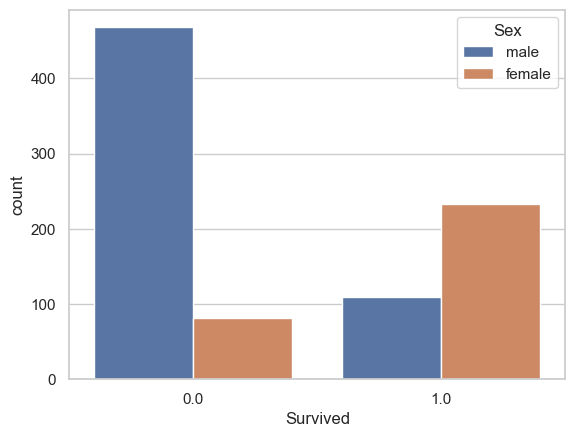

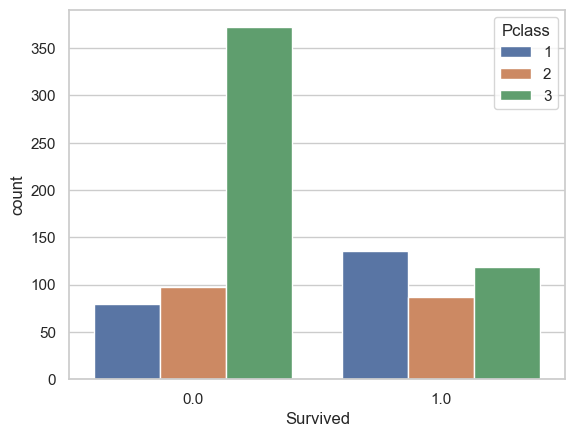

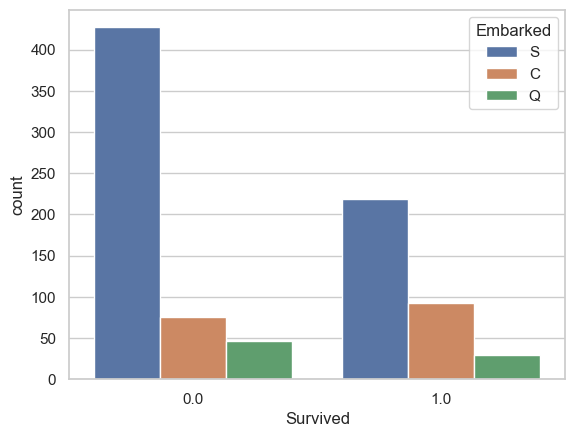

In [67]:
temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x="Survived", hue=col_name, data=temp_df)
    plt.show()

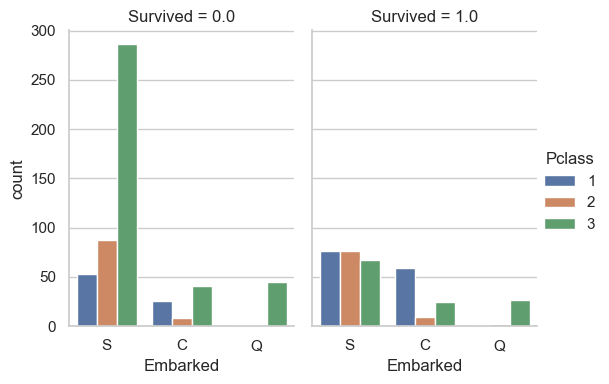

In [68]:
temp_df = pd.merge(
    one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(x="Embarked", hue="Pclass", col="Survived",
                data=temp_df, kind="count",
                height=4, aspect=.7)

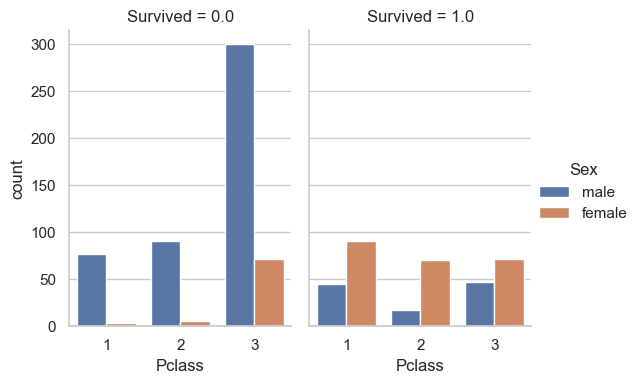

In [69]:
temp_df = pd.merge(
    one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=temp_df, kind="count",
                height=4, aspect=.7)

In [70]:
crosscheck_colums = [col_name fo col_name in one_hot_df.columns.tolist()
                        if col_name.split("_")[0] in temp_columns and "_" in col_name ]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2231942520.py, line 1)

### Mean Encoding

In [ ]:
temp_df = pd.merge(
    one_hot_df["Pclass"], y_true, left_index=True, right_index=True)
temp_df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
temp_df["Pclass"].replace(
    temp_df.groupby("Pclass")["Survived"].mean()
)

0      0.242363
1      0.629630
2      0.242363
3      0.629630
4      0.242363
         ...   
886    0.472826
887    0.629630
888    0.242363
889    0.629630
890    0.242363
Name: Pclass, Length: 891, dtype: float64

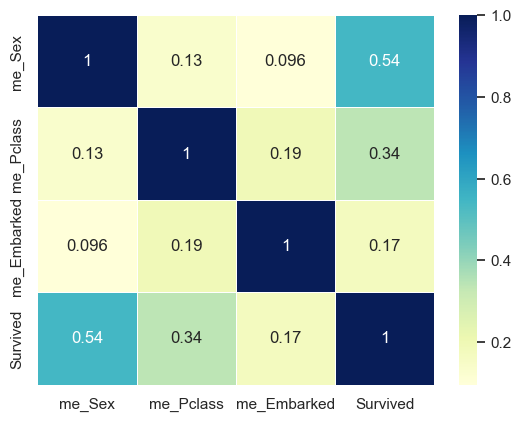

In [ ]:
temp_columns = ["Sex", "Pclass", "Embarked"]

me_list = []
for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True,right_index=True)
    temp_df["me_"+col_name] = temp_df[col_name].replace(temp_df.groupby(col_name)["Survived"].mean())
    # sns.countplot(x=col_name, hue="Survived", data=temp_df)
    # plt.show()
    # sns.countplot(x="me_"+col_name, hue="Survived", data=temp_df)
    # plt.show()
    me_list.append(temp_df.drop("Survived", axis=1))
temp_df = pd.merge(
    pd.concat(me_list,axis=1)[["me_" + col_name for col_name in temp_columns]],
    y_true, left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

### Categorical Combination

In [71]:
temp_columns = ["Sex", "Pclass", "Embarked"]
one_hot_df["Sex-Pclass"] = df["Sex"].map(str) + df["Pclass"].map(str)
one_hot_df["Embarked-Pclass"] = df["Embarked"].map(str) + df["Pclass"].map(str)

one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df["Sex-Pclass"], prefix="SexPclass"), on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df["Embarked-Pclass"], prefix="EmbarkedPclass"), on=None, index=True)


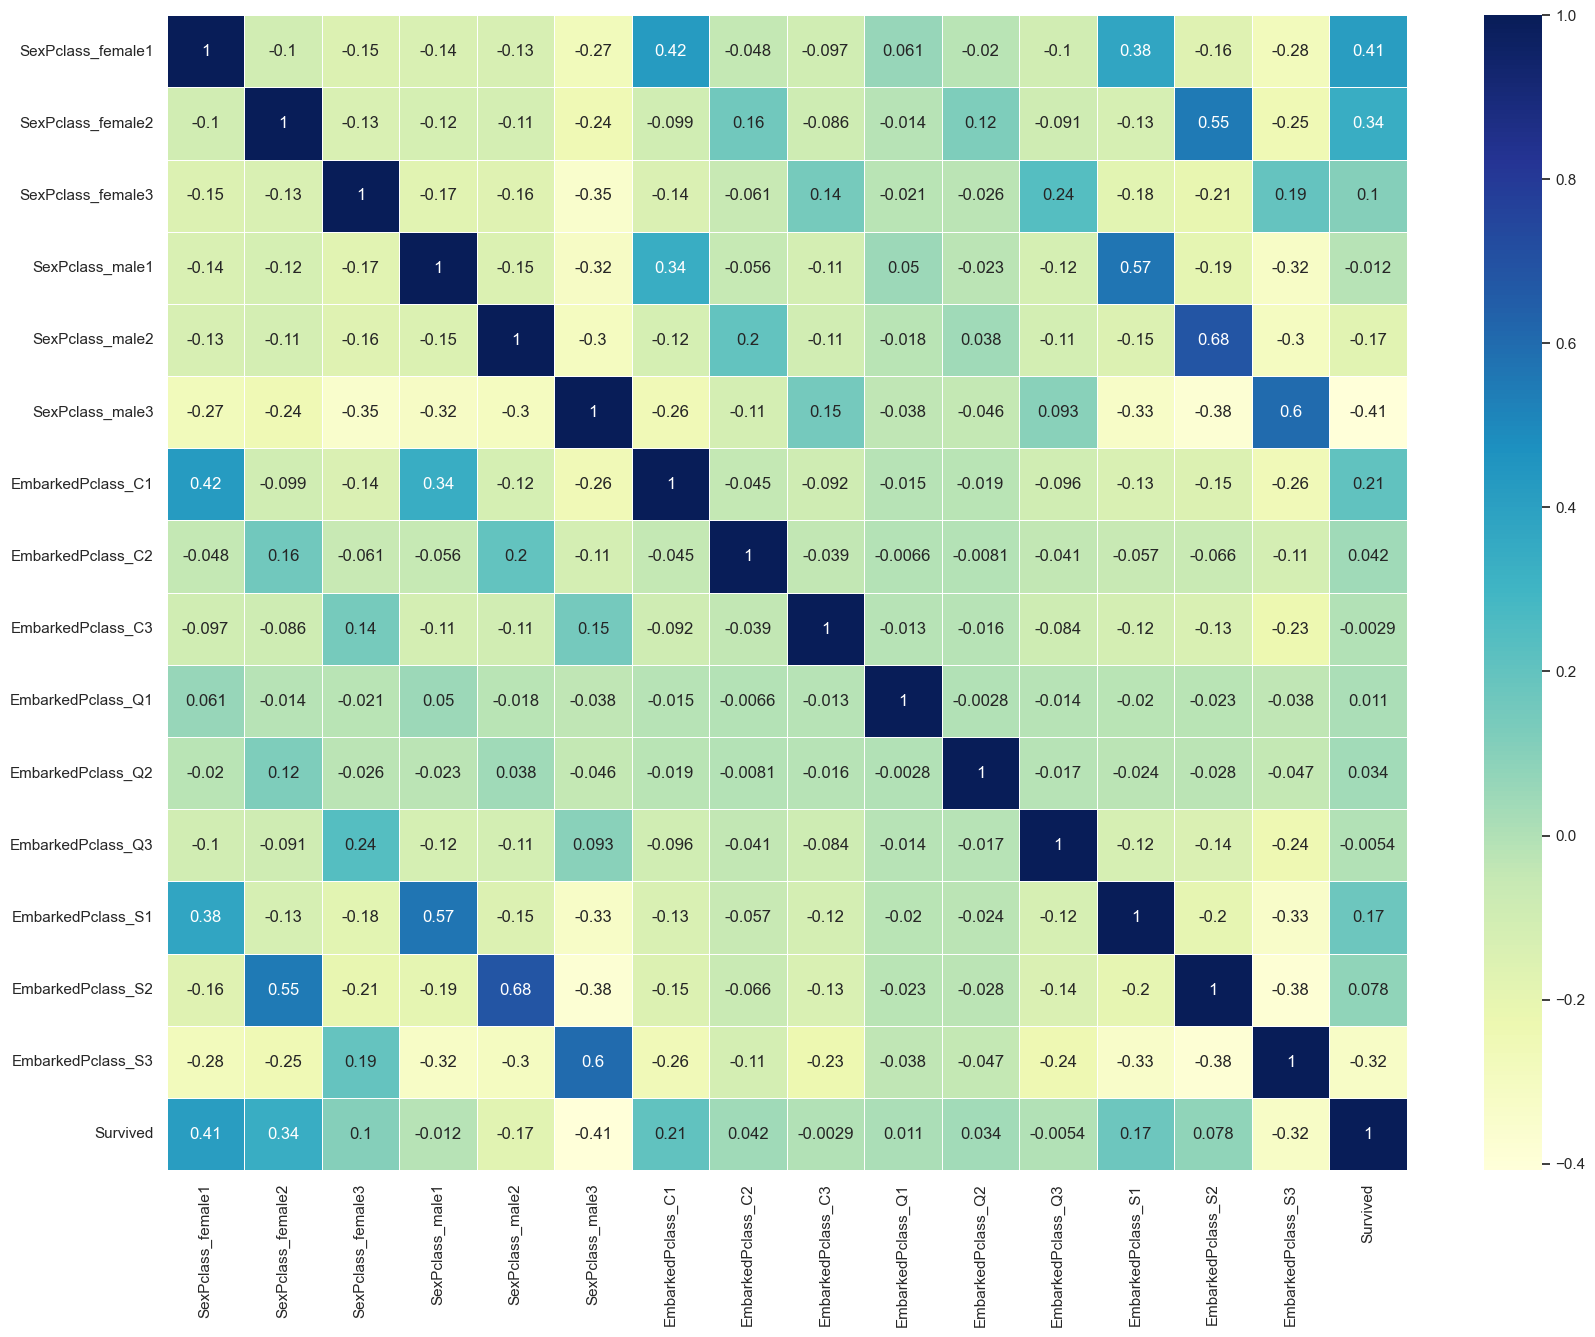

In [72]:
crosscheck_colums = [col_name for col_name in one_hot_df.columns.tolist()
                        if col_name.split("_")[0] in ["SexPclass", "EmbarkedPclass"] and "_" in col_name]
temp_df = pd.merge(one_hot_df[crosscheck_colums], y_true, left_index=True, right_index=True)
corr = temp_df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")